In [26]:
import yfinance as yf


In [27]:
# Define the ticker symbol for gold (e.g., "GC=F" for gold futures)
gold_ticker = "GC=F"

In [28]:
# Set the start and end dates for the data
start_date = "2010-01-01"
end_date = "2024-01-01"

In [29]:
# Download the data
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
gold_data
grams_per_troy_ounce = 31.1035
gold_data['Close_per_kg'] = gold_data['Close'] / grams_per_troy_ounce

[*********************100%%**********************]  1 of 1 completed


                  Close  Close_per_kg
Date                                 
2010-01-04  1117.699951     35.934861
2010-01-05  1118.099976     35.947722
2010-01-06  1135.900024     36.520007
2010-01-07  1133.099976     36.429983
2010-01-08  1138.199951     36.593951


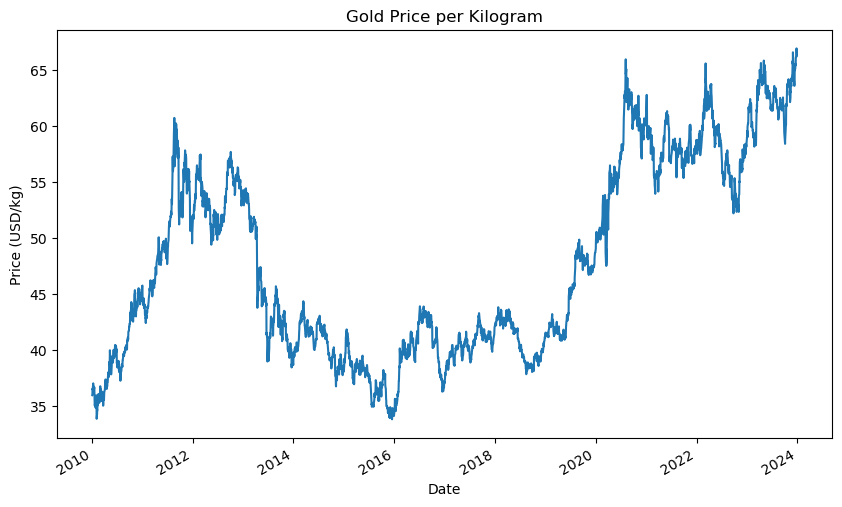

In [30]:
# Print the first few rows of the dataset, including the converted column
print(gold_data[['Close', 'Close_per_kg']].head())
plt.figure(figsize=(10, 6))
gold_data['Close_per_kg'].plot(title='Gold Price per Kilogram', ylabel='Price (USD/kg)')
plt.show()

In [31]:
 import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [32]:
to_row = int(len(gold_data)*0.9)
training_data = list(gold_data[0:to_row]['Adj Close']) 
testing_data = list (gold_data[to_row:]['Adj Close'])
training_data

[1117.699951171875,
 1118.0999755859375,
 1135.9000244140625,
 1133.0999755859375,
 1138.199951171875,
 1150.699951171875,
 1128.9000244140625,
 1136.4000244140625,
 1142.5999755859375,
 1130.0999755859375,
 1139.699951171875,
 1112.300048828125,
 1102.699951171875,
 1089.199951171875,
 1095.199951171875,
 1097.9000244140625,
 1084.4000244140625,
 1083.5999755859375,
 1083.0,
 1104.300048828125,
 1117.4000244140625,
 1111.4000244140625,
 1062.4000244140625,
 1052.199951171875,
 1065.699951171875,
 1076.699951171875,
 1075.800048828125,
 1094.199951171875,
 1089.5,
 1119.300048828125,
 1119.5,
 1118.0,
 1121.300048828125,
 1112.5999755859375,
 1102.699951171875,
 1096.5,
 1107.800048828125,
 1118.300048828125,
 1117.800048828125,
 1136.9000244140625,
 1142.699951171875,
 1132.5999755859375,
 1134.800048828125,
 1123.5999755859375,
 1122.0,
 1107.800048828125,
 1108.0,
 1101.5,
 1105.0999755859375,
 1122.199951171875,
 1124.0,
 1127.4000244140625,
 1107.4000244140625,
 1099.300048828125,

In [33]:
testing_data


[1794.0,
 1795.5999755859375,
 1789.699951171875,
 1798.5999755859375,
 1781.4000244140625,
 1773.199951171875,
 1760.300048828125,
 1755.300048828125,
 1747.5999755859375,
 1734.0,
 1746.800048828125,
 1747.800048828125,
 1757.699951171875,
 1736.0999755859375,
 1736.5999755859375,
 1723.199951171875,
 1712.800048828125,
 1696.5999755859375,
 1709.800048828125,
 1700.4000244140625,
 1715.300048828125,
 1708.0,
 1716.199951171875,
 1728.0999755859375,
 1705.0,
 1696.5,
 1665.4000244140625,
 1671.699951171875,
 1666.199951171875,
 1659.699951171875,
 1664.5999755859375,
 1670.800048828125,
 1645.300048828125,
 1623.300048828125,
 1626.699951171875,
 1660.4000244140625,
 1658.5,
 1662.4000244140625,
 1692.9000244140625,
 1721.0999755859375,
 1711.4000244140625,
 1711.699951171875,
 1700.5,
 1667.300048828125,
 1678.699951171875,
 1670.300048828125,
 1670.0,
 1641.699951171875,
 1657.0,
 1649.0,
 1627.5,
 1630.800048828125,
 1651.0,
 1648.699951171875,
 1652.800048828125,
 1664.0,
 1660.6

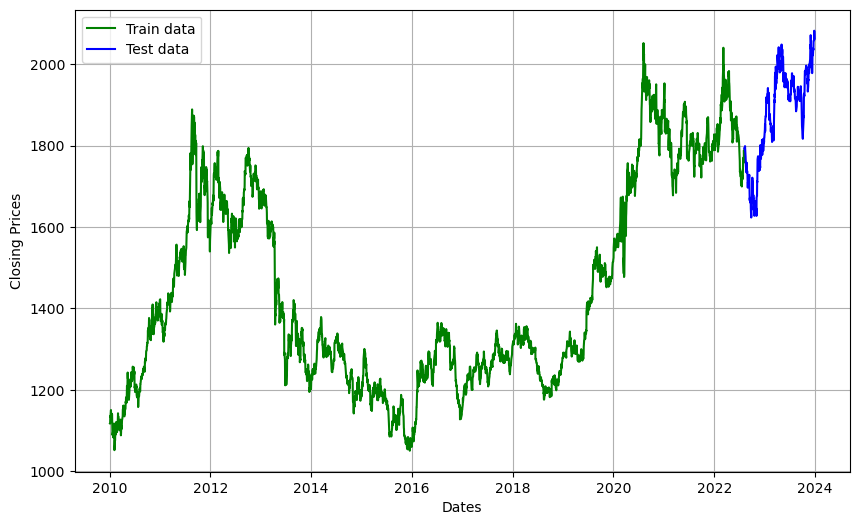

In [34]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(gold_data[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(gold_data[to_row:] ['Adj Close'], 'blue', label='Test data')
plt.legend()

In [35]:
model_predictions = []
n_test_obser = len(testing_data)

In [36]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [38]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3519
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -14639.765
Date:                Wed, 17 Jan 2024   AIC                          29289.531
Time:                        23:16:41   BIC                          29320.359
Sample:                             0   HQIC                         29300.530
                               - 3519                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0286      0.012     -2.346      0.019      -0.052      -0.005
ar.L2         -0.0071      0.012     -0.596      0.551      -0.030       0.016
ar.L3          0.0117      0.013      0.879      0.3

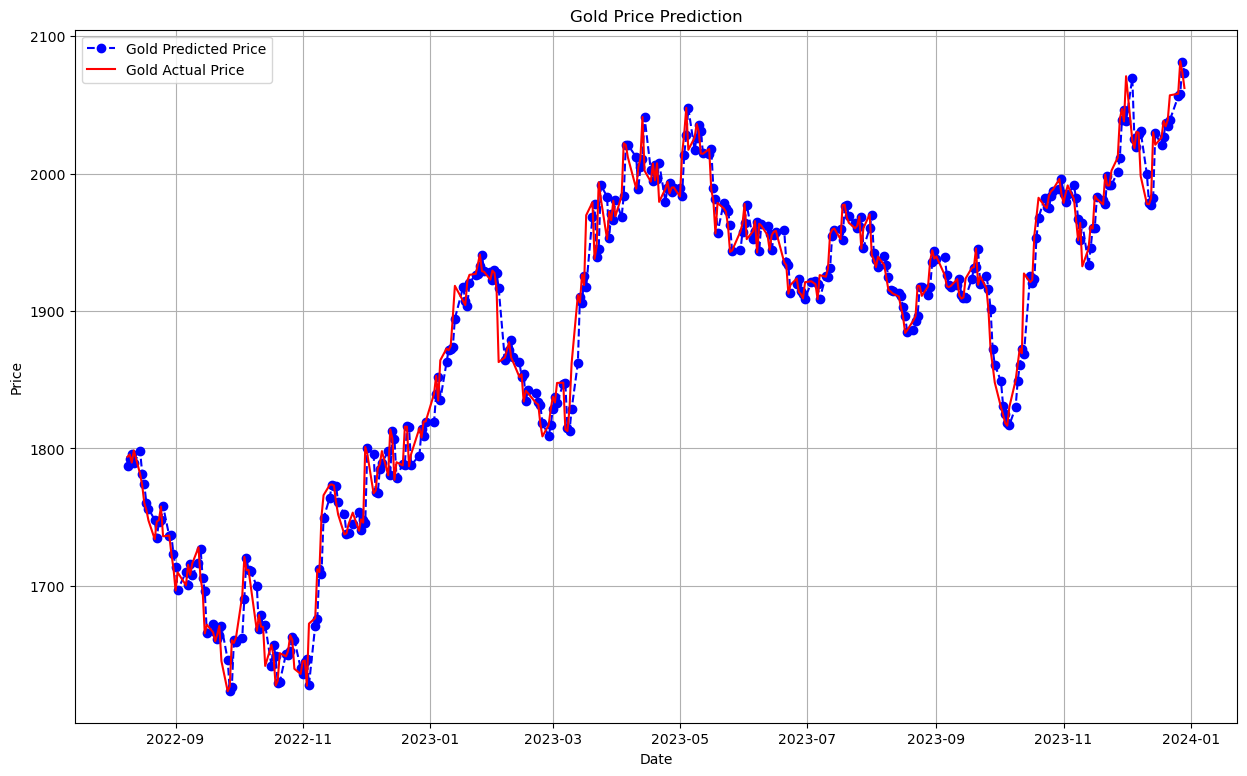

In [39]:
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = gold_data[to_row:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='Gold Predicted Price')
plt.plot(date_range, testing_data, color='red', label='Gold Actual Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
